___
# Ciência dos Dados - PROJETO 1

## Gabriel Couto & Daniel

#### Importando bibliotecas e preparando DataFrame:

In [5]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image


#Se já existir o output ele o carrega, se não ele carrega a PNAD inteira e salva o output
if os.path.isfile('./output.csv') == True:
    dados = pd.read_table("output.csv", encoding="utf-8", sep=";", index_col=False)
else:
    tabela = pd.read_table("PES2015.csv", encoding="windows-1252", sep=",")
    
    colunas = ['V8005', # Int
           'V0302','V4704','V4707','UF', #Category
           'V4719'] #Float

    dados = tabela.loc[:,colunas]

    #Adotando nomes mais identificáveis às colunas:
    colunas[0] = 'Idade' 

    colunas[1] = 'Sexo'
    colunas[2] = 'Economicamente' #Condição de atividade na semana
    colunas[3] = 'CHT' #Horas trabalhadas na semana em todos empregos (Carga Horária de Trabalho semanal)
    colunas[4] = 'Local' # (Norte, Nordeste, Centro-Oeste, Sudeste, Sul)
    colunas[5] = 'Salario' #Rendimento mensal de todos os trabalhos

    #Renomeando colunas
    dados.columns = colunas 

    #Unindo estados por regiões:
    dados.Local = dados.Local//10 

    #Definindo as variáveis qualitativas como categóricas:
    for i in range(1,5): #1 a 4
        dados[colunas[i]] = dados[colunas[i]].astype('category')

    #Definindo as categorias das variáveis categóricas:
    dados[colunas[1]].cat.categories=(['Masculino','Feminino'])
    dados[colunas[2]].cat.categories=(['Ativa','Inativa'])
    dados[colunas[3]].cat.categories=(['< 14','15 a 39','40 a 44','45 a 48','> 49'])
    dados[colunas[4]].cat.categories=(['Norte','Nordeste','Sudeste','Sul','Centro-Oeste']) 
    
    # Salvar excel com os dados filtrados
    dados.to_csv('output.csv', sep=';', encoding='utf-8', index=False)


## Introdução

#### Objetivos : Observar as diferenças salariais da população economicamente ativa do país de acordo com o Sexo, CHT, Local e Idade 

Variáveis Analizadas: <br>
&emsp; -Idade <br>
&emsp; -Sexo <br>
&emsp; -Economicamente (Ativa ou Inativa) <br>
&emsp; -CHT (Carga Horária de trabalho semanal)  <br>
&emsp; -Local <br>
&emsp; -Salário <br>
    
Obs: Apenas a populaçao economicamente ativa recebem valores nas variáveis 'CHT' e 'Salario

___
## Filtros da base de dados <br>
&emsp; 1) Filtrar adultos (a partir de 18 anos) <br>
&emsp; 2) Filtrar pessoas que declararam o salário (999 999 999 999 = não declararam)  <br>
&emsp; 3) Salario vindo de trabalho assalariado precisa ser diferente de zero <br>

In [6]:
#Filtrando maiores de 18 anos:
dados = dados[dados.Idade>=18]

#Retirando pessoas com salário 999 999 999 999 (não declararam)
dados = dados[(dados.Salario!=999999999999)]

In [7]:
dados.head()

,Idade,Sexo,Economicamente,CHT,Local,Salario
0,23,Masculino,Ativa,40 a 44,Norte,800.0
1,23,Feminino,Ativa,40 a 44,Norte,1150.0
2,35,Feminino,Ativa,40 a 44,Norte,880.0
3,34,Masculino,Ativa,> 49,Norte,3000.0
7,18,Feminino,Ativa,40 a 44,Norte,880.0


___
## Análise e Resultados

#### Explorando variáveis quantitativas:

Tabela de frequências das variáveis quantitativas:

In [8]:
dados.describe().round(1)

,Idade,Salario
count,259468.0,158531.0
mean,43.2,1755.2
std,17.0,2860.2
min,18.0,0.0
25%,29.0,788.0
50%,41.0,1100.0
75%,55.0,1900.0
max,115.0,200000.0


Para análises das variáveis quantitativas nós dividimos elas em classes:<br>
OBS: Como os maiores valores de Salario são muito distantes do restante, usamos apenas os primeiros 99% para criar as classes

In [9]:
#Idade é dividida da idade mínima a máxima em faixas de 5 em 5 anos
faixaIdade = np.arange(dados.Idade.min(),dados.Idade.max(),5)
Idadecat = pd.cut(dados.Idade[dados.Economicamente=='Ativa'], bins=faixaIdade, right=False)


#Salario é dividido do salário mínimo ao máximo em 50 faixas igualmente espaçadas
perc99Salario = dados.Salario[dados.Salario > 0].quantile(0.99)

faixaSalario = np.linspace(dados.Salario.min(),perc99Salario,50)
Salariocat = pd.cut(dados.Salario[dados.Economicamente=='Ativa'], bins=faixaSalario, right=False)

Gráfico de colunas para Salário e Idade para a população em geral:

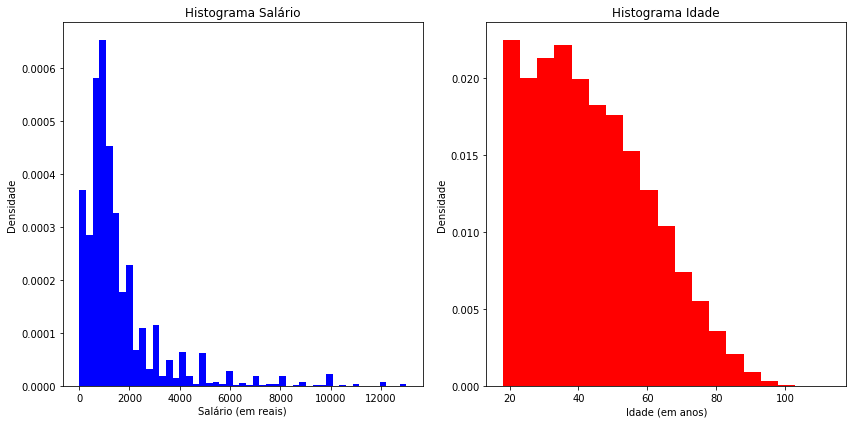

In [10]:
fig = plt.figure(figsize=(12, 6))
plt.subplot(121)
plot = dados.Salario.plot.hist(bins=faixaSalario, title='Histograma Salário', density=True, color='blue')
plt.ylabel('Densidade')
plt.xlabel('Salário (em reais)')

plt.subplot(122)
plot = dados.Idade.plot.hist(bins=faixaIdade, title='Histograma Idade', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')

plt.tight_layout()
plt.show()

#### Explorando variáveis quantitativas:

Tabelas de frequência das variáveis qualitativas:

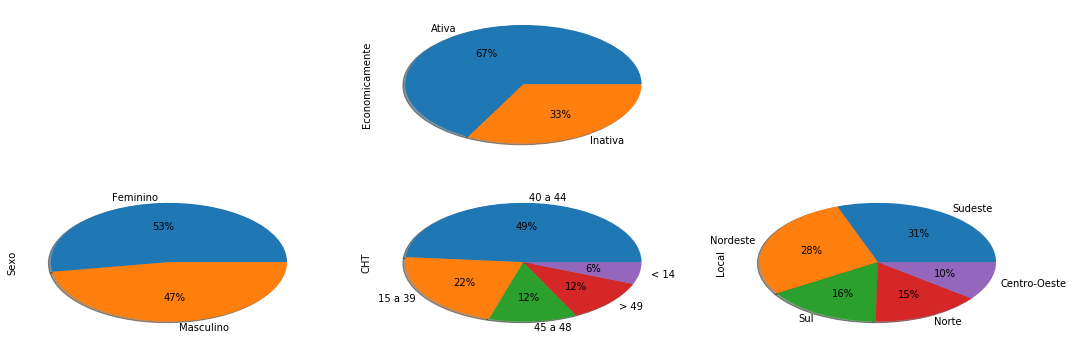

In [24]:
fig = plt.figure(figsize=(18,6))

ax1 = plt.subplot2grid((2,3), (0,1)) #(linhas,col) do grid e depois (linha,col) do item
dados.Economicamente.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

ax1 = plt.subplot2grid((2,3), (1, 0))
dados.Sexo.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

ax1 = plt.subplot2grid((2,3), (1, 1))
dados.CHT.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

ax1 = plt.subplot2grid((2,3), (1, 2))
dados.Local.value_counts().plot.pie(autopct='%1.0f%%', shadow = True);

Diferenças salariais da população economicamente ativa do país por sexo:

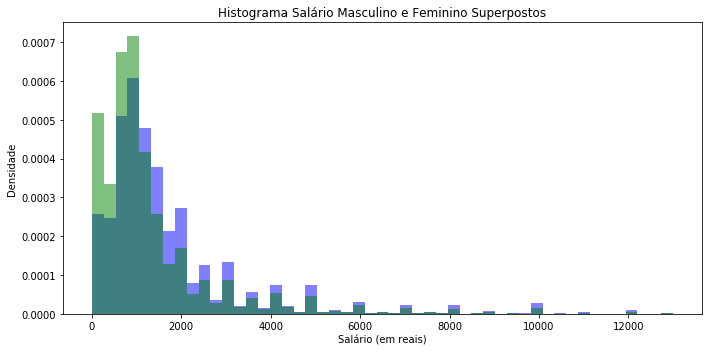

In [25]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(111)

plot = dados[dados.Sexo=='Masculino'].Salario.plot.hist(bins=faixaSalario, title='Histograma Salário Masculino e Feminino Superpostos', density=True, color='blue', alpha=0.5)
plot = dados[dados.Sexo=='Feminino'].Salario.plot.hist(bins=faixaSalario, density=True, color='g', alpha = 0.5)

plt.ylabel('Densidade')
plt.xlabel('Salário (em reais)')

plt.tight_layout()
plt.show()

Proporcionalmente há mais mulheres recebendo salários abaixo de 1200 reais enquanto há mais homens recebendo mais de 1.200 reais.

In [13]:
# grafico=pd.crosstab(dados.Local,dados.Economicamente,margins=True,rownames=['Local'], colnames=['Economicamente'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Pessoas economicamente ativas por Local');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

In [14]:
# grafico=pd.crosstab(dados.Local,dados.Sexo[(dados.Economicamente=='Ativa')],margins=True,rownames=['Local'], colnames=['Sexo'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Pessoas Economicamente Ativas por Local');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

In [15]:
# grafico=pd.crosstab(dados.Local,dados.Sexo[(dados.Economicamente=='Inativa')],margins=True,rownames=['Local'], colnames=['Sexo'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Pessoas Economicamente Inativas por Local');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

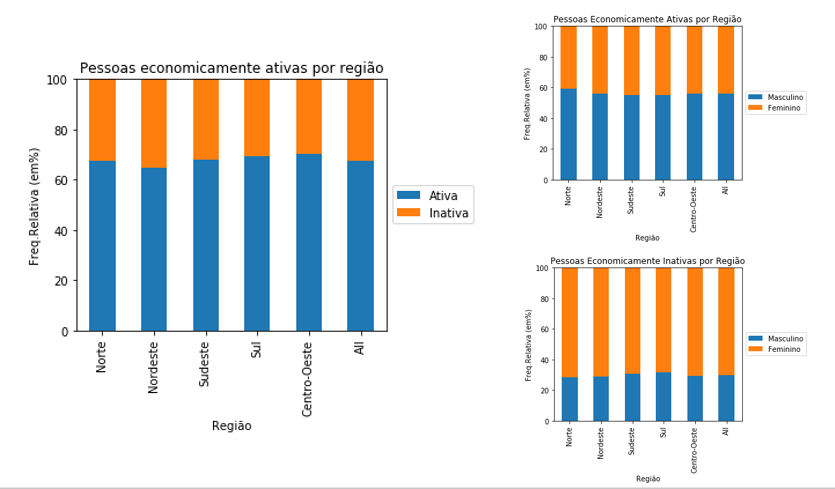

In [16]:
Image("img/grafico_economicamente.png")

In [17]:
# grafico=pd.crosstab(dados.Local[(dados.Economicamente=='Ativa')&(dados.Sexo=='Feminino')],dados['CHT'],margins=True,rownames=['Local'], colnames=['CH de Trabalho (h)'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Carga horária de trabalho das mulheres');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

In [18]:
# grafico=pd.crosstab(dados.Local[(dados.Economicamente=='Ativa')&(dados.Sexo=='Masculino')],dados['CHT'],margins=True,rownames=['Local'], colnames=['CH de Trabalho (h)'], normalize='index')*100
# plot = grafico.plot(kind='bar', stacked=True,title='Carga horária de trabalho dos homens');
# plot.set_ylim([0, 100])
# plt.ylabel('Freq.Relativa (em%)')

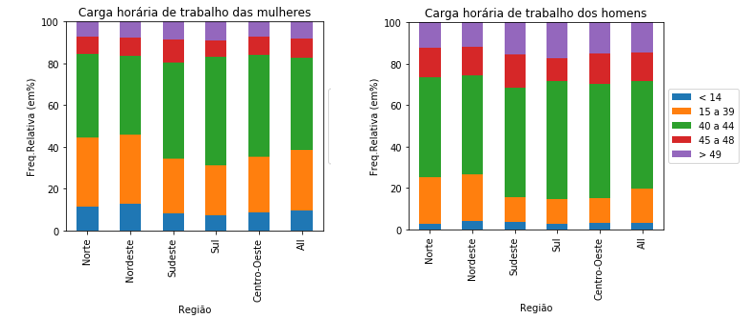

In [19]:
Image("img/grafico_carga_horaria.png")

In [20]:
X,Y = 'Economicamente','Local'
pd.crosstab(dados[X],dados[Y],margins=True,rownames=[X], colnames=[Y], normalize='columns')*100

Local,Centro-Oeste,Nordeste,Norte,Sudeste,Sul,All
Economicamente,,,,,,
Ativa,70.153381,64.725003,67.285599,67.735431,68.943768,67.263786
Inativa,29.846619,35.274997,32.714401,32.264569,31.056232,32.736214


In [21]:
X,Y = 'Economicamente','Sexo'
pd.crosstab(dados[X],dados[Y],rownames=[X], colnames=[Y],margins=True, normalize='index')*100

Sexo,Feminino,Masculino
Economicamente,,
Ativa,44.004973,55.995027
Inativa,70.251943,29.748057
All,52.597237,47.402763


In [22]:
X,Y = 'Local','Sexo'
ct1 = pd.crosstab(dados[X],dados[Y],rownames=[X], colnames=[Y],margins=True, normalize='index')*100
ct1.round(1)

Sexo,Feminino,Masculino
Local,,
Centro-Oeste,52.1,47.9
Nordeste,53.5,46.5
Norte,50.8,49.2
Sudeste,52.9,47.1
Sul,52.4,47.6
All,52.6,47.4


In [23]:
X,Y = 'Local','CHT'
pd.crosstab(dados[X],dados[Y],rownames=[X], colnames=[Y],margins=True, normalize=True)*100

CHT,15 a 39,40 a 44,45 a 48,< 14,> 49,All
Local,,,,,,
Centro-Oeste,2.051965,5.835452,1.349263,0.592313,1.316462,11.145454
Nordeste,7.208685,11.687304,3.156480,2.014117,2.678341,26.744927
Norte,3.959478,6.720452,1.746662,0.895093,1.563732,14.885417
Sudeste,5.584397,15.200182,4.181517,1.669074,3.820704,30.455873
Sul,2.856224,9.200093,1.612934,0.814983,2.284096,16.768329
All,21.660748,48.643483,12.046855,5.985580,11.663334,100.000000


___
## Conclusão 

Descreva aqui suas conclusões!

In [26]:
# print('Distribuição de Sexo, CHT e Local para pessoas economicamentes ativas')

# fig = plt.figure(figsize=(20, 5))
# plt.subplot(141)
# dados.Economicamente.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

# plt.subplot(142)
# # dados.Sexo[dados.Economicamente == 'Ativa'].value_counts().plot.pie(autopct='%1.0f%%', shadow = True)
# dados.Sexo.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

# plt.subplot(143)
# # dados.CHT[dados.Economicamente == 'Ativa'].value_counts().plot.pie(autopct='%1.0f%%', shadow = True)
# dados.CHT.value_counts().plot.pie(autopct='%1.0f%%', shadow = True)

# plt.subplot(144)
# # dados.Local[dados.Economicamente == 'Ativa'].value_counts().plot.pie(autopct='%1.0f%%', shadow = True); #; no final da linha impede retornar aqueles logs chatos
# dados.Local.value_counts().plot.pie(autopct='%1.0f%%', shadow = True); #; no final da linha impede retornar aqueles logs chatos
